In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'U wind component (m/s)')

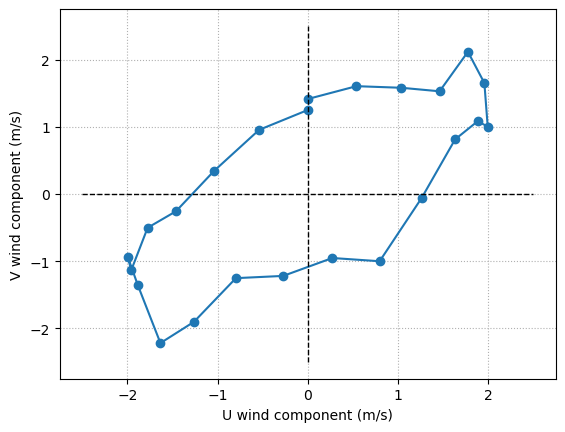

In [11]:
#Generate some random data with 24 hourly samples
h = np.linspace(0, 2 * np.pi, 24)
u = 2*np.sin(h)
v = 2*np.sin(h+np.pi/4)
v = np.random.uniform(v-0.4, v+0.4, 24)

#Plot the data
plt.plot(u,
        np.random.uniform(v-0.4, v+0.4, 24),
        marker='o', linestyle='-', color='tab:blue')
plt.gca().grid(ls=":")
plt.plot([0, 0], [-2.5, 2.5], color='k', lw=1, ls="--")
plt.plot([-2.5, 2.5], [0, 0], color='k', lw=1, ls="--")
plt.ylabel("V wind component (m/s)")
plt.xlabel("U wind component (m/s)")

/jobfs/140915311.gadi-pbs/ipykernel_142777/475405173.py:26: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0].squeeze()


The ellipse is given by 0.45x^2 + -0.565xy+0.428y^2+0.0897x+-0.0898y = 1


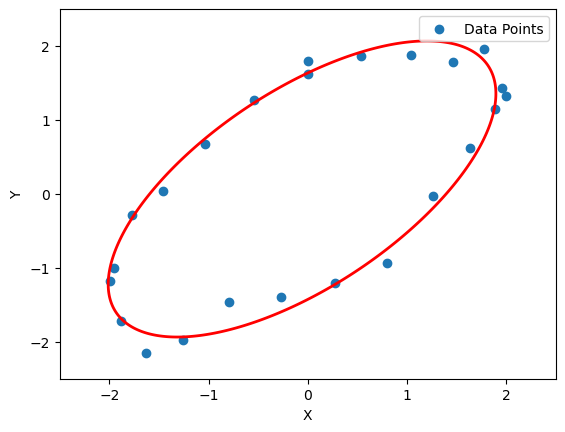

In [12]:
# import numpy as np
# import matplotlib.pyplot as plt
# alpha = 5
# beta = 3
# N = 500
# DIM = 2

# np.random.seed(2)

# # Generate random points on the unit circle by sampling uniform angles
# theta = np.random.uniform(0, 2*np.pi, (N,1))
# eps_noise = 0.2 * np.random.normal(size=[N,1])
# circle = np.hstack([np.cos(theta), np.sin(theta)])

# # Stretch and rotate circle to an ellipse with random linear tranformation
# B = np.random.randint(-3, 3, (DIM, DIM))
# noisy_ellipse = circle.dot(B) + eps_noise

# Extract x coords and y coords of the ellipse as column vectors
X = u[np.newaxis].T
Y = v[np.newaxis].T

# Formulate and solve the least squares problem ||Ax - b ||^2
A = np.hstack([X**2, X * Y, Y**2, X, Y])
b = np.ones_like(X)
x = np.linalg.lstsq(A, b)[0].squeeze()

# Print the equation of the ellipse in standard form
print('The ellipse is given by {0:.3}x^2 + {1:.3}xy+{2:.3}y^2+{3:.3}x+{4:.3}y = 1'.format(x[0], x[1],x[2],x[3],x[4]))

# Plot the noisy data
plt.scatter(X, Y, label='Data Points')

# Plot the original ellipse from which the data was generated
phi = np.linspace(0, 2*np.pi, 1000).reshape((1000,1))
c = np.hstack([np.cos(phi), np.sin(phi)])
#ground_truth_ellipse = c.dot(B)
#plt.plot(ground_truth_ellipse[:,0], ground_truth_ellipse[:,1], 'k--', label='Generating Ellipse')

# Plot the least squares ellipse
x_coord = np.linspace(-2.5,2.5,300)
y_coord = np.linspace(-2.5,2.5,300)
X_coord, Y_coord = np.meshgrid(x_coord, y_coord)
Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord
plt.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'), linewidths=2)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [10]:
x

array([ 0.46925732, -0.64811904,  0.47732719, -0.01174857,  0.01188357])

In [9]:
x0 = (C * D - B * E) / (B**2 - A * C)
y0 = (A * E - B * D) / (B**2 - A * C)
numerator = 2 * (A * E**2 + C * D**2 + F * B**2 - 2 * B * D * E - A * C * F)
denominator1 = (B**2 - A * C) * ((C - A) * np.sqrt(1 + 4 * B**2 / ((A - C)**2)) - (C + A))
denominator2 = (B**2 - A * C) * ((A - C) * np.sqrt(1 + 4 * B**2 / ((A - C)**2)) - (C + A))
width = np.sqrt(numerator / denominator1)
height = np.sqrt(numerator / denominator2)
phi = 0.5 * np.arctan2(B, A - C)

NameError: name 'C' is not defined

In [8]:
x[0]

0.4692573237990288

Use the least-squares ellipse fitting package by:

From Ben Hammel, & Nick Sullivan-Molina. (2020, March 21). bdhammel/least-squares-ellipse-fitting: v2.0.0 (Version v2.0.0). Zenodo. http://doi.org/10.5281/zenodo.3723294, 

to get ellipse parameters (centre, width, height, phi)

In [39]:
from ellipse import LsqEllipse

X = np.array(list(zip(u, v)))
fit = LsqEllipse().fit(X)

center, width, height, phi = fit.as_parameters()

print(f'center: {center[0]:.3f}, {center[1]:.3f}')
print(f'width: {width:.3f}')
print(f'height: {height:.3f}')
print(f'phi: {phi:.3f}')



center: -0.000, -0.000
width: 2.613
height: 1.082
phi: 0.785


In [40]:
#Now convert the ellipse parameters to a parametric form
#u = u0 + u1 * cos(t) + u2 * sin(t)
#v = v0 + v1 * cos(t) + v2 * sin(t)

u0, v0 = center
u1 = width * np.cos(phi)
u2 = -height * np.sin(phi)
v1 = width * np.sin(phi)
v2 = height * np.cos(phi)

print("\nParametric form:")
print(f"u = {u0:.3f} + {u1:.3f} * cos(t) + {u2:.3f} * sin(t)")
print(f"v = {v0:.3f} + {v1:.3f} * cos(t) + {v2:.3f} * sin(t)")



Parametric form:
u = -0.000 + 1.848 * cos(t) + -0.765 * sin(t)
v = -0.000 + 1.848 * cos(t) + 0.765 * sin(t)


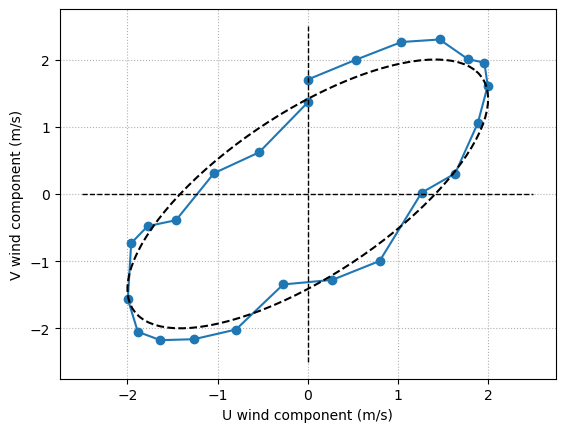

In [42]:
#Plot the original data
plt.plot(u,
        np.random.uniform(v-0.4, v+0.4, 24),
        marker='o', linestyle='-', color='tab:blue')
plt.gca().grid(ls=":")
plt.plot([0, 0], [-2.5, 2.5], color='k', lw=1, ls="--")
plt.plot([-2.5, 2.5], [0, 0], color='k', lw=1, ls="--")
plt.ylabel("V wind component (m/s)")
plt.xlabel("U wind component (m/s)")

#Plot the fitted ellipse with the parametric form using 100 points
t = np.linspace(0, 2 * np.pi, 100)
ufit = u0 + u1 * np.cos(t) + u2 * np.sin(t)
vfit = v0 + v1 * np.cos(t) + v2 * np.sin(t)
plt.plot(ufit, vfit, color="k", ls="--")

In [52]:
0.5 * np.arctan2(
    2*(u1*u2 + v1*v2),
    u1**2 + v1**2 - u2**2 - v2**2
)

np.float64(3.9252311467094465e-17)

In [50]:
u[0]

np.float64(0.0)